In [ ]:
# 50 Startups csv 파일을 가지고, 딥러닝 이용해서 학습하고, 평가까지 해보세요.

In [1]:
import numpy as np
import pandas as pd

In [3]:
import os 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/MyDrive/kdigital2/deeplearning')

In [6]:
df = pd.read_csv('data/50_Startups.csv')

In [7]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [8]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
X =  df.iloc[ : , : -2+1 ]

In [11]:
y = df['Profit']

In [12]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [13]:
X['State'].nunique()

3

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
ct = ColumnTransformer( [('encoder',OneHotEncoder(), [3])] , 
                       remainder = 'passthrough')

In [17]:
X = ct.fit_transform(X)

In [20]:
X = X[ : ,  1 :  ]

In [22]:
X.shape

(50, 5)

In [23]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
sc_X = MinMaxScaler()

In [27]:
X_scaled = sc_X.fit_transform(X)

In [32]:
y.shape

(50,)

In [34]:
y = y.values.reshape(50 , 1)

In [28]:
sc_y = MinMaxScaler()

In [36]:
y_scaled = sc_y.fit_transform(y)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state = 10)

In [39]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [41]:
X_train.shape

(40, 5)

In [40]:
model = Sequential()

In [42]:
model.add(Dense(units=10, activation='relu', input_shape=(5,) ))

In [43]:
model.add(Dense(units= 10, activation='relu'))

In [45]:
model.add(Dense(units= 1, activation='linear'))

In [46]:
model.compile('adam', 'mean_squared_error')

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [48]:
epoch_history = model.fit(X_train, y_train, epochs = 30, batch_size = 10)

Epoch 1/30
4/4 [==============================] - 1s 6ms/step - loss: 0.2847
Epoch 2/30
4/4 [==============================] - 0s 5ms/step - loss: 0.2588
Epoch 3/30
4/4 [==============================] - 0s 6ms/step - loss: 0.2341
Epoch 4/30
4/4 [==============================] - 0s 6ms/step - loss: 0.2111
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 0.1900
Epoch 6/30
4/4 [==============================] - 0s 4ms/step - loss: 0.1705
Epoch 7/30
4/4 [==============================] - 0s 5ms/step - loss: 0.1519
Epoch 8/30
4/4 [==============================] - 0s 5ms/step - loss: 0.1356
Epoch 9/30
4/4 [==============================] - 0s 6ms/step - loss: 0.1203
Epoch 10/30
4/4 [==============================] - 0s 5ms/step - loss: 0.1073
Epoch 11/30
4/4 [==============================] - 0s 5ms/step - loss: 0.0940
Epoch 12/30
4/4 [==============================] - 0s 5ms/step - loss: 0.0831
Epoch 13/30
4/4 [==============================] - 0s 6ms/step - loss: 0.

In [49]:
import matplotlib.pyplot as plt

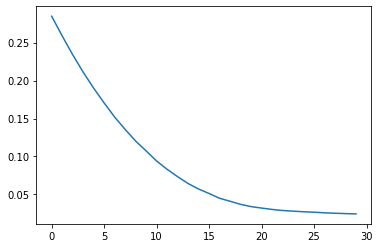

In [50]:
plt.plot(epoch_history.history['loss'])
plt.show()

In [51]:
# 검증, 평가!! 

In [52]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 125ms/step - loss: 0.0199


0.019932031631469727

In [53]:
y_pred = model.predict(X_test)

In [54]:
y_pred

array([[0.3187526 ],
       [0.6015069 ],
       [0.39264035],
       [0.3917585 ],
       [0.32455987],
       [0.56205654],
       [0.75306714],
       [0.4701228 ],
       [0.65472406],
       [0.5130511 ]], dtype=float32)

In [55]:
y_test

array([[0.42385155],
       [0.52963376],
       [0.28448478],
       [0.3199513 ],
       [0.15698988],
       [0.58448237],
       [0.94729239],
       [0.48009902],
       [0.79440736],
       [0.79649041]])

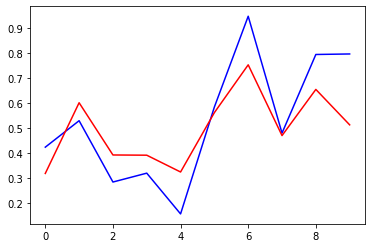

In [58]:
plt.plot(y_test, c='b')
plt.plot(y_pred, c='r')
plt.show()

In [59]:
# 새로운 신규 회사가 있는데, 플로리다에 있고, 운영비는 2십만 달라, 연구개발비는 25만달라, 
# 마케팅비는 38만달러를 쓰고 있다.
# 이회사의 수익을 예측하시오.

In [61]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [62]:
new_data = np.array([250000, 200000, 380000, 'Florida'])

In [65]:
new_data = new_data.reshape(1, 4)

In [67]:
new_data = ct.transform(new_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  "X does not have valid feature names, but"


In [68]:
new_data

array([['0.0', '1.0', '0.0', '250000', '200000', '380000']], dtype='<U32')

In [71]:
new_data = new_data[ : , 1 :  ]

In [72]:
new_data

array([['1.0', '0.0', '250000', '200000', '380000']], dtype='<U32')

In [74]:
new_data = sc_X.transform(new_data)

In [75]:
new_data

array([[1.        , 0.        , 1.51195168, 1.13211115, 0.80545317]])

In [77]:
y_pred = model.predict(new_data)

In [78]:
y_pred

array([[0.80836725]], dtype=float32)

In [79]:
sc_y.inverse_transform(y_pred)

array([[158231.6]], dtype=float32)